In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Dataset

In [2]:
df = pd.read_csv('../data/CustomerData_LeadGenerator.csv')

In [3]:
df

,fakeID,b_specialisation_i,b_specialisation_h,b_specialisation_g,b_specialisation_f,b_specialisation_e,b_specialisation_d,b_specialisation_c,b_specialisation_b,b_specialisation_a,...,q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita,b_in_kontakt_gewesen,b_gekauft_gesamt
0,1069_7334,0,0,0,0,0,0,0,0,0,...,0.186735,23730.35,2194057,324656,0.147971,593.19,326.28,235.75,1,1
1,328_2350,0,0,0,1,1,1,0,0,0,...,0.179848,23343.26,1966798,281130,0.142938,588.54,320.36,230.66,1,1
2,865_6285,0,0,0,1,0,1,0,0,0,...,0.184935,23674.18,2149624,320326,0.149015,592.88,325.57,234.82,1,1
3,47_307,0,1,1,0,0,0,0,0,0,...,0.184523,23572.26,2161445,310981,0.143876,590.84,324.06,233.81,1,0
4,342_2513,0,0,0,0,0,1,0,0,0,...,0.189871,23821.63,2302959,334940,0.145439,593.56,327.75,237.41,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,54_1517,0,0,0,0,0,0,0,0,0,...,0.203542,23869.52,327760,41107,0.125418,584.76,325.57,238.12,0,0
3768,957_6790,0,0,0,0,0,0,0,0,0,...,0.184899,23677.97,2150320,320715,0.149148,593.07,326.32,235.05,0,0
3769,932_6575,0,0,0,0,0,0,0,0,0,...,0.186292,23721.89,2167556,323263,0.149137,593.23,326.22,235.53,0,0
3770,247_7458,0,0,0,0,0,0,0,0,0,...,0.222034,24711.33,328260,38239,0.116490,593.55,342.68,253.26,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   fakeID                                          3772 non-null   object 
 1   b_specialisation_i                              3772 non-null   int64  
 2   b_specialisation_h                              3772 non-null   int64  
 3   b_specialisation_g                              3772 non-null   int64  
 4   b_specialisation_f                              3772 non-null   int64  
 5   b_specialisation_e                              3772 non-null   int64  
 6   b_specialisation_d                              3772 non-null   int64  
 7   b_specialisation_c                              3772 non-null   int64  
 8   b_specialisation_b                              3772 non-null   int64  
 9   b_specialisation_a                       

In [5]:
df.groupby(['fakeID', 'b_gekauft_gesamt']).size().max()

1

In [6]:
df['b_gekauft_gesamt'].nunique()

2

In [7]:
df['q_2017 HHs: 5th Quintile (68.759 and above)']

0       195228
1       168291
2       189787
3       189634
4       207590
         ...  
3767     30435
3768    189967
3769    192599
3770     32954
3771     22666
Name: q_2017 HHs: 5th Quintile (68.759 and above), Length: 3772, dtype: int64

In [8]:
df['q_OpeningHours']

0       36.0
1       20.0
2        0.0
3       20.0
4       33.0
        ... 
3767     0.0
3768     0.0
3769     0.0
3770     0.0
3771    27.0
Name: q_OpeningHours, Length: 3772, dtype: float64

In [9]:
df['q_5th Quint by Total HH']

0       0.186735
1       0.179848
2       0.184935
3       0.184523
4       0.189871
          ...   
3767    0.203542
3768    0.184899
3769    0.186292
3770    0.222034
3771    0.163071
Name: q_5th Quint by Total HH, Length: 3772, dtype: float64

In [10]:
df['q_OpeningDays']

0       4
1       4
2       0
3       4
4       5
       ..
3767    0
3768    0
3769    0
3770    0
3771    4
Name: q_OpeningDays, Length: 3772, dtype: int64

## Data Preprocessing, ML model building, training, and evaluation.

We considered the Lead Generator problem as a classification problem of identifying a customer as a hot lead or not, i.e, a binary classification problem.
A hot lead is someone who subscribes to a sales offer when they were contacted by the company and by their own interests. 

Initially for data preprocessing, we split the given dataset into training and test datasets. We considered 'b_gekauft_gesamt' as target feature for classifocation whereas the rest of the features were used as training features. We applied Standard Scaling to the numerical features. 

For model building, we built Logistic Regression, Decision Tree, Random Forest, Perceptron, Multi-layer Perceptron, and Gradient Boosting models to classify a given customer as hot lead or not. We applied Recursive Feature Elimination (RFE) process to select top features for traning the respective models. We further went to build a generalized linear regression model by performing stepwise RFE and finding features that are statistically significant. 

For model evaluation, we performed Repeated Stratified 10 fold cross validation on the training set to see whether the model overfits or not by comparing the training and validation accuracy. Repeated Stratified K-Folds technique repeats Stratified K-Fold sets n times with different randomization in each repetition. StratifiedKFold is a variation of k-fold which returns stratified folds where each set contains approximately the same percentage of samples of each target class as the complete set. For test set evaluation, we measured the test accuracy, test precision, recall, and test F1-score of each models respectively. We also plot the ROC curve for each ml models implemented to solve the problem.

In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def load_data(filename):
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        return df
    return None


def preprocess_dataset(input_data):
    """ The preprocessing selects the relevant data.

    :param input_data: Input data
    :return X: Transformed data containing the training data.
    :rtype: .... """

    X = input_data
    # Putting response variable to y
    y = X['b_gekauft_gesamt']
    # dropping the target variable for the training data
    X = X.drop('b_gekauft_gesamt', axis=1)
    # Splitting the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                        test_size=0.2, random_state=100)

    # Scaling
    scaler = StandardScaler()
    # the fields in the data with binary values despite being int64/float64 datatype
    binary_vals = ['fakeID', 'b_specialisation_i', 'b_specialisation_a',
                   'b_specialisation_b', 'b_specialisation_c', 'b_specialisation_d',
                   'b_specialisation_e', 'b_specialisation_f', 'b_specialisation_g',
                   'b_specialisation_h', 'b_specialisation_j', 'b_in_kontakt_gewesen',
                   'b_gekauft_gesamt']

    # Scaling the dataset with numerical values
    for i in X.columns:
        if i not in binary_vals:
            X_train[[i]] = scaler.fit_transform(X_train[[i]])
            X_test[[i]] = scaler.fit_transform(X_test[[i]])

    return X_train, y_train, X_test, y_test

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Perceptron, PoissonRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


def get_ml_models():
    """
    The ML training algorithms for the Lead Generator Problem.
    The following ml algorithms were used to predict a given customer as a hot lead or not.
    """
    models = dict()
    # Logistic regression
    # feature selection by Recursive Feature Elimination
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
    model = LogisticRegression()
    models['LR'] = Pipeline(steps=[('feature_selection', rfe), ('m', model)])

    # Perceptron
    # feature selection by Recursive Feature Elimination
    rfe = RFE(estimator=Perceptron(), n_features_to_select=10)
    model = Perceptron()
    models['Perceptron'] = Pipeline(steps=[('feature_selection', rfe), ('m', model)])

    # Decision Tree
    # feature selection by Recursive Feature Elimination
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['CART'] = Pipeline(steps=[('feature_selection', rfe), ('m', model)])

    # Random Forest
    # feature selection by Recursive Feature Elimination
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
    model = RandomForestClassifier()
    models['RandomForest'] = Pipeline(steps=[('feature_selection', rfe), ('m', model)])

    # Gradient Boosting
    # feature selection by Recursive Feature Elimination
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=10)
    model = GradientBoostingClassifier()
    models['GBM'] = Pipeline(steps=[('feature_selection', rfe), ('m', model)])

    # Multilayer Perceptron
    # feature selection by Recursive Feature Elimination
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
    model = MLPClassifier(random_state=1, early_stopping=True)
    models['MLP'] = Pipeline(steps=[('feature_selection', rfe), ('m', model)])

    return models

In [13]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate


def evaluate_model(model, X, y, X_test, y_test):
    """
    Performs the cross validation of the ML algorithms and returns the training,
     validation scores, and test predictions.
    """
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    model.fit(X, y)
    # cross validation
    scores = cross_validate(model, X, y, scoring=('accuracy', 'f1_weighted'),
                            cv=cv, n_jobs=-1, return_train_score=True)
    # test prediction from the trained ml model
    y_test_pred = model.predict(X_test)

    # test metrics like accuracy, precision, recall, f1-score
    test_acc = metrics.accuracy_score(y_test_pred, y_test)
    test_p, test_r, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    return scores, y_test_pred, test_acc, test_p, test_r, test_f1


In [20]:
from numpy import mean, std
from sklearn.metrics import ConfusionMatrixDisplay


def batch_prediction(X_train, y_train, X_test, y_test, models):
    """
    Finding the predictions for each model on the dataset by calling the evaluate_model()
    """
    #  the models and store results
    results, names = list(), list()
    # test prediction list for all models
    test_preds = []

    for name, model in models.items():
        # prediction and evaluation scores for each model
        scores, y_test_pred, test_acc, test_p, test_r, test_f1 = evaluate_model(model, X_train, y_train,
                                                                                X_test, y_test)
        # appending the test prediction of the respective model
        test_preds.append((model, y_test_pred))
        # appending the evaluation scores
        results.append(scores)
        # appending the names of the model
        names.append(name)
        # printing the training accuracy
        print('Average Training accuracy for %s is %.3f (%.3f)'
              % (name, mean(scores['train_accuracy'])*100,
                 std(scores['train_accuracy'])))

        # printing the validation accuracy
        print('Average Validation accuracy for %s is %.3f (%.3f)'
              % (name, mean(scores['test_accuracy'])*100,
                 std(scores['test_accuracy'])))
        # printing thr training F1-score
        print('Average Training F1 score for %s is %.3f (%.3f)'
              % (name, mean(scores['train_f1_weighted']),
                 std(scores['train_f1_weighted'])))
        # printing the validation F1-score
        print('Average Validation F1-score for %s is %.3f (%.3f)'
              % (name, mean(scores['test_f1_weighted']),
                 std(scores['test_f1_weighted'])))
        # printing the test accuracy of a model
        print('Test accuracy for %s is %.3f' % (name, test_acc*100))
        # printing the test precision of a model
        print('Test Precision for %s is %f' % (name, test_p))
        # printing the test recall of a model
        print('Test Recall for %s is %.3f' % (name, test_r))
        # printing the test F1-score of a model
        print('Test F1-score for %s is %.3f' % (name, test_f1))
        metrics.plot_roc_curve(model, X_test, y_test)
        #plt.show()
        cm = metrics.confusion_matrix(y_test, y_test_pred)
        cm_display = ConfusionMatrixDisplay(cm).plot()
        plt.show()
        print('-------------------------------------------------')


Average Training accuracy for LR is 98.442 (0.000)
Average Validation accuracy for LR is 98.442 (0.001)
Average Training F1 score for LR is 0.977 (0.000)
Average Validation F1-score for LR is 0.977 (0.002)
Test accuracy for LR is 98.675
Test Precision for LR is 0.973685
Test Recall for LR is 0.987
Test F1-score for LR is 0.980


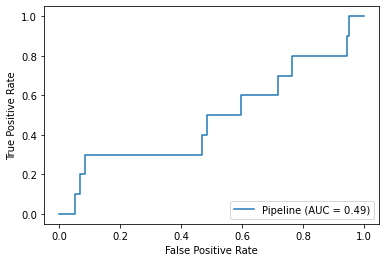

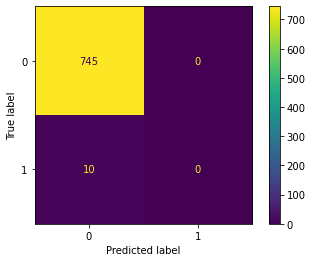

-------------------------------------------------
Average Training accuracy for Perceptron is 95.214 (0.174)
Average Validation accuracy for Perceptron is 95.198 (0.174)
Average Training F1 score for Perceptron is 0.944 (0.175)
Average Validation F1-score for Perceptron is 0.944 (0.175)
Test accuracy for Perceptron is 98.675
Test Precision for Perceptron is 0.973685
Test Recall for Perceptron is 0.987
Test F1-score for Perceptron is 0.980


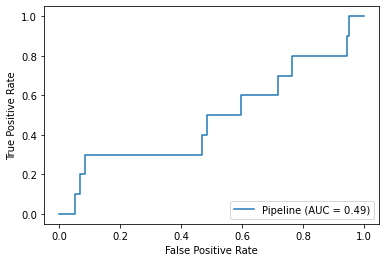

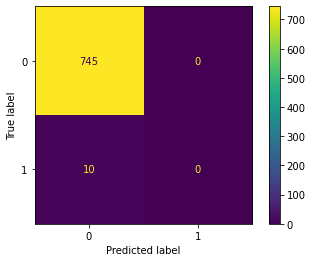

-------------------------------------------------
Average Training accuracy for CART is 100.000 (0.000)
Average Validation accuracy for CART is 98.531 (0.006)
Average Training F1 score for CART is 1.000 (0.000)
Average Validation F1-score for CART is 0.986 (0.005)
Test accuracy for CART is 98.940
Test Precision for CART is 0.989517
Test Recall for CART is 0.989
Test F1-score for CART is 0.986


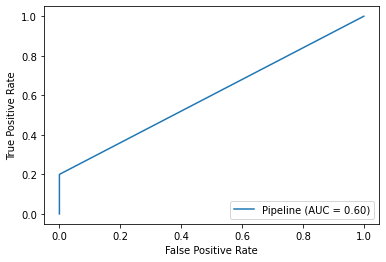

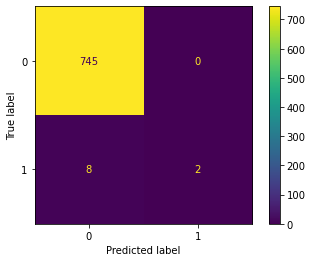

-------------------------------------------------
Average Training accuracy for RandomForest is 100.000 (0.000)
Average Validation accuracy for RandomForest is 98.641 (0.005)
Average Training F1 score for RandomForest is 1.000 (0.000)
Average Validation F1-score for RandomForest is 0.986 (0.005)
Test accuracy for RandomForest is 99.073
Test Precision for RandomForest is 0.990815
Test Recall for RandomForest is 0.991
Test F1-score for RandomForest is 0.988


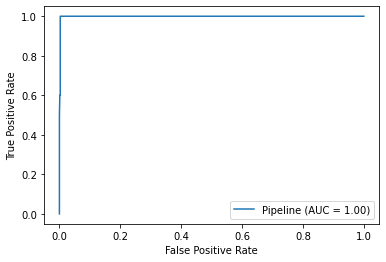

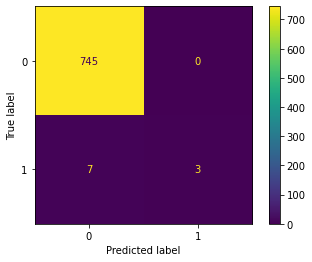

-------------------------------------------------
Average Training accuracy for GBM is 99.998 (0.000)
Average Validation accuracy for GBM is 98.630 (0.006)
Average Training F1 score for GBM is 1.000 (0.000)
Average Validation F1-score for GBM is 0.987 (0.005)
Test accuracy for GBM is 99.338
Test Precision for GBM is 0.993422
Test Recall for GBM is 0.993
Test F1-score for GBM is 0.992


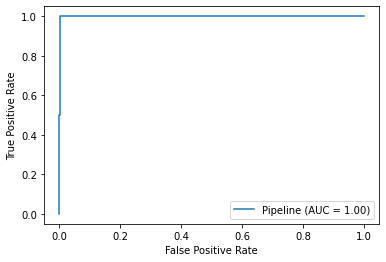

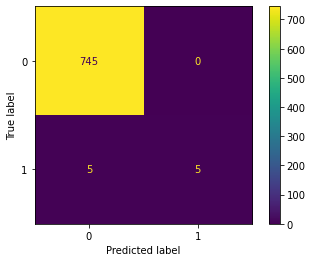

-------------------------------------------------
Average Training accuracy for MLP is 98.384 (0.000)
Average Validation accuracy for MLP is 98.376 (0.002)
Average Training F1 score for MLP is 0.976 (0.000)
Average Validation F1-score for MLP is 0.976 (0.003)
Test accuracy for MLP is 98.411
Test Precision for MLP is 0.973651
Test Recall for MLP is 0.984
Test F1-score for MLP is 0.979


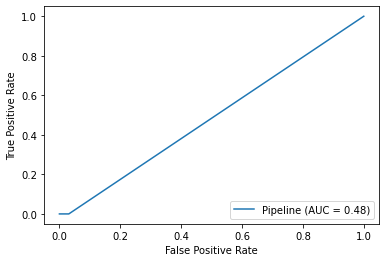

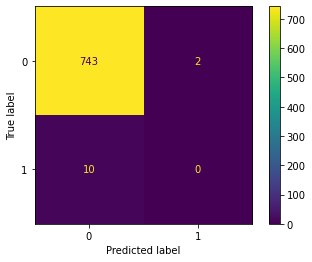

-------------------------------------------------


In [21]:
def main():
    input_data = load_data('../../data/CustomerData_LeadGenerator.csv')
    X_train, y_train, X_test, y_test = preprocess_dataset(input_data)
    # getting all the implemented ml models
    models = get_ml_models()
    # getting the predictions for both the training and testing datasets
    batch_prediction(X_train, y_train, X_test, y_test, models)


if __name__ == "__main__":
    main()

| Model               | Training Accuracy | Validation Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1-Score | Training F1-score | Validation F1-score |
|---------------------|-------------------|---------------------|---------------|----------------|-------------|---------------|-------------------|---------------------|
| Logistic Regression | 98.442            | 98.442              | 98.675        | 0.973685       | 0.987       | 0.980         | 0.977             | 0.977               |
| Perceptron          | 95.214            | 95.198              | 98.675        | 0.973685       | 0.987       | 0.980         | 0.944             | 0.944               |
| CART                | 100.000           | 98.531              | 98.940        | 0.989517       | 0.989       | 0.986         | 1.000             | 0.986               |
| Random Forest       | 100.000           | 98.641              | 99.073        | 0.990815       | 0.991       | 0.988         | 1.000             | 0.986               |
|  Gradient Boosting  | 99.998            | 98.630              | 99.338        | 0.993422       | 0.993       | 0.992         | 1.000             | 0.987               |
| MLP                 | 98.384            | 98.376              | 98.411        | 0.973651       | 0.984       | 0.979         | 0.976             | 0.976               |

We propose Gradient Boosting Regression model as the best model. We observed that the decision tree (CART) and random forest overfit on the data due to higher training accuracy than the test and the validation accuracy respectively. We later performed hyperparameter tuning using GridSearch for the Decision Tree Classifier and we found that after hyperparameter tuning, the Decision Tree Classifier does not overfit on the dataset.

We further model Generalized Linear Regression model (GLM) of Scikit-learn to tackle this problem. We used Recursive Feature Elimation algorithm for feature selection and Varaince Inflation factor to detect multicolinearity. 

### Generalized Linear Regression using Binomial family approach

In [24]:
# X_train 
input_data = load_data('../../data/CustomerData_LeadGenerator.csv')
X_train, y_train, X_test, y_test = preprocess_dataset(input_data)
X_train.head()

,fakeID,b_specialisation_i,b_specialisation_h,b_specialisation_g,b_specialisation_f,b_specialisation_e,b_specialisation_d,b_specialisation_c,b_specialisation_b,b_specialisation_a,...,q_2017 HHs: 5th Quintile (68.759 and above),q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita,b_in_kontakt_gewesen
3238,126_7063,0,0,0,0,0,0,0,0,0,...,-0.553573,2.141162,0.744760,-0.614371,-0.680823,-0.755155,0.228086,-0.256468,1.249804,0
2749,735_5245,0,1,1,0,0,0,0,0,0,...,1.502948,-0.578047,0.304215,1.540897,1.509163,1.069482,0.710068,-0.254674,-0.154053,0
1483,601_8289,0,0,0,0,0,0,0,0,0,...,-0.557678,-0.335044,-0.171183,-0.531153,-0.656873,-0.890152,0.093886,-0.254674,-0.073988,0
1327,83_1189,0,0,0,0,0,0,0,0,0,...,-0.935209,0.024857,-2.600537,-0.917839,-0.834914,-1.733868,-3.213326,-1.250443,-2.222081,0
177,82_565,0,0,0,0,0,0,0,0,0,...,1.768693,-0.321627,0.546667,1.722752,1.694203,1.089905,0.831112,0.099677,0.208057,0


 Intially the dataset has a string value in 'q_OpeningHours' which we have removed while preprocessing. 

In [25]:
# After removing the string value of 'ject'
sum(X_test['q_OpeningHours'] == 'ject')

0

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017 entries, 3238 to 1544
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   fakeID                                          3017 non-null   object 
 1   b_specialisation_i                              3017 non-null   int64  
 2   b_specialisation_h                              3017 non-null   int64  
 3   b_specialisation_g                              3017 non-null   int64  
 4   b_specialisation_f                              3017 non-null   int64  
 5   b_specialisation_e                              3017 non-null   int64  
 6   b_specialisation_d                              3017 non-null   int64  
 7   b_specialisation_c                              3017 non-null   int64  
 8   b_specialisation_b                              3017 non-null   int64  
 9   b_specialisation_a                    

In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 3059 to 417
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   fakeID                                          755 non-null    object 
 1   b_specialisation_i                              755 non-null    int64  
 2   b_specialisation_h                              755 non-null    int64  
 3   b_specialisation_g                              755 non-null    int64  
 4   b_specialisation_f                              755 non-null    int64  
 5   b_specialisation_e                              755 non-null    int64  
 6   b_specialisation_d                              755 non-null    int64  
 7   b_specialisation_c                              755 non-null    int64  
 8   b_specialisation_b                              755 non-null    int64  
 9   b_specialisation_a                      

In [28]:
# test set
X_test.head()

,fakeID,b_specialisation_i,b_specialisation_h,b_specialisation_g,b_specialisation_f,b_specialisation_e,b_specialisation_d,b_specialisation_c,b_specialisation_b,b_specialisation_a,...,q_2017 HHs: 5th Quintile (68.759 and above),q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita,b_in_kontakt_gewesen
3059,1167_7750,0,1,1,0,1,0,0,0,0,...,1.544519,-0.435068,0.513583,1.539480,1.592484,1.244665,0.850925,0.004939,0.087371,0
2411,467_6330,0,0,1,0,0,0,0,0,1,...,-0.204503,0.355757,0.745632,-0.246277,-0.287624,0.465635,0.673988,0.713548,0.856665,0
3350,1242_8103,1,1,1,1,1,0,0,0,1,...,1.571299,-0.410769,0.532909,1.558897,1.606398,1.237072,0.860684,0.035630,0.120701,0
2300,384_6415,1,0,0,1,1,0,0,0,0,...,-0.700188,1.242524,0.021566,-0.709873,-0.739199,-0.982821,-0.407575,-0.371481,0.483728,0
3602,3_471,0,0,0,0,0,0,0,0,0,...,-0.891317,1.400865,0.410556,-0.889990,-0.808328,-0.876345,-0.411818,1.608110,1.374633,0


In [29]:
print(len(X_train.columns))
#dropping fakeID since they have all unique values

X_train.drop(['fakeID'], 1, inplace = True)
X_test.drop(['fakeID'], 1, inplace = True)

25


In [31]:
# after dropping the 'fakeID' column
X_train.head()

,b_specialisation_i,b_specialisation_h,b_specialisation_g,b_specialisation_f,b_specialisation_e,b_specialisation_d,b_specialisation_c,b_specialisation_b,b_specialisation_a,b_specialisation_j,...,q_2017 HHs: 5th Quintile (68.759 and above),q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita,b_in_kontakt_gewesen
3238,0,0,0,0,0,0,0,0,0,0,...,-0.553573,2.141162,0.744760,-0.614371,-0.680823,-0.755155,0.228086,-0.256468,1.249804,0
2749,0,1,1,0,0,0,0,0,0,0,...,1.502948,-0.578047,0.304215,1.540897,1.509163,1.069482,0.710068,-0.254674,-0.154053,0
1483,0,0,0,0,0,0,0,0,0,1,...,-0.557678,-0.335044,-0.171183,-0.531153,-0.656873,-0.890152,0.093886,-0.254674,-0.073988,0
1327,0,0,0,0,0,0,0,0,0,1,...,-0.935209,0.024857,-2.600537,-0.917839,-0.834914,-1.733868,-3.213326,-1.250443,-2.222081,0
177,0,0,0,0,0,0,0,0,0,0,...,1.768693,-0.321627,0.546667,1.722752,1.694203,1.089905,0.831112,0.099677,0.208057,0


In [32]:
# after dropping the 'fakeID' column
X_test.head()

,b_specialisation_i,b_specialisation_h,b_specialisation_g,b_specialisation_f,b_specialisation_e,b_specialisation_d,b_specialisation_c,b_specialisation_b,b_specialisation_a,b_specialisation_j,...,q_2017 HHs: 5th Quintile (68.759 and above),q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita,b_in_kontakt_gewesen
3059,0,1,1,0,1,0,0,0,0,0,...,1.544519,-0.435068,0.513583,1.539480,1.592484,1.244665,0.850925,0.004939,0.087371,0
2411,0,0,1,0,0,0,0,0,1,0,...,-0.204503,0.355757,0.745632,-0.246277,-0.287624,0.465635,0.673988,0.713548,0.856665,0
3350,1,1,1,1,1,0,0,0,1,0,...,1.571299,-0.410769,0.532909,1.558897,1.606398,1.237072,0.860684,0.035630,0.120701,0
2300,1,0,0,1,1,0,0,0,0,0,...,-0.700188,1.242524,0.021566,-0.709873,-0.739199,-0.982821,-0.407575,-0.371481,0.483728,0
3602,0,0,0,0,0,0,0,0,0,0,...,-0.891317,1.400865,0.410556,-0.889990,-0.808328,-0.876345,-0.411818,1.608110,1.374633,0


### Plotting the heat map to identify the highly correlated features and removing the highly correlated features from the training datset for training the Genelarized Linear Regression (GLM) model. The feature selection algorithm of RFE(Recursive Feature Elimination) was also applied to select top features. 

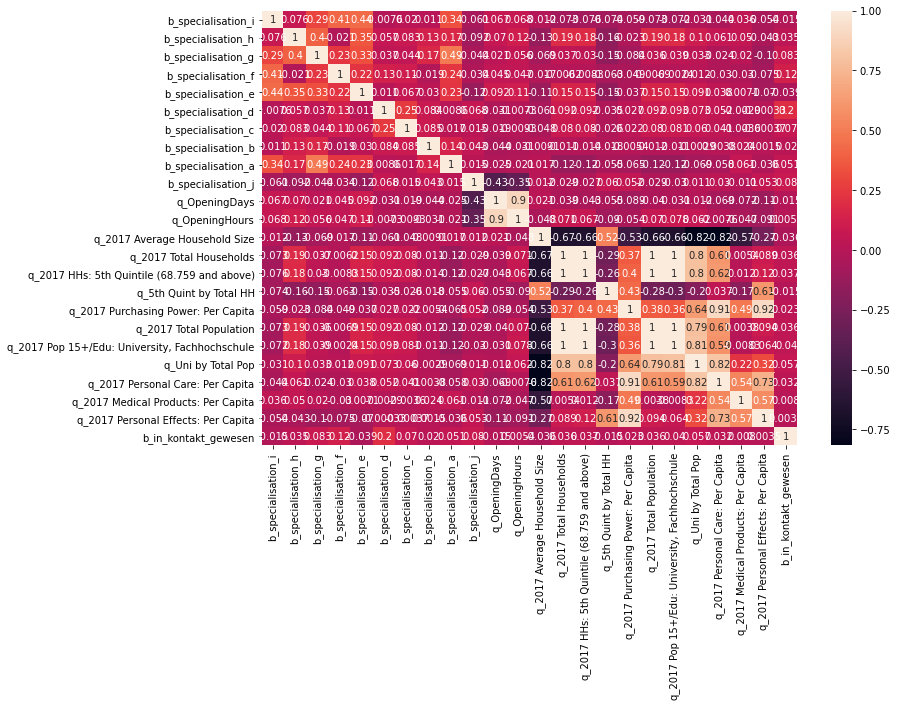

In [33]:
plt.figure(figsize=(12, 8))

df_corr = X_train.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

In [34]:
### Dropping highly correlated variables
X_train = X_train.drop(['q_OpeningDays', 'q_OpeningHours'], axis=1)
X_test = X_test.drop(['q_OpeningDays', 'q_OpeningHours'], axis=1)

In [36]:
### Dropping highly correlated variables
X_train = X_train.drop(['q_2017 Total Households', 'q_2017 HHs: 5th Quintile (68.759 and above)',
                       'q_2017 Total Population', 'q_2017 Pop 15+/Edu: University, Fachhochschule'], axis=1)
X_test = X_test.drop(['q_2017 Total Households', 'q_2017 HHs: 5th Quintile (68.759 and above)',
                       'q_2017 Total Population', 'q_2017 Pop 15+/Edu: University, Fachhochschule'], axis=1)

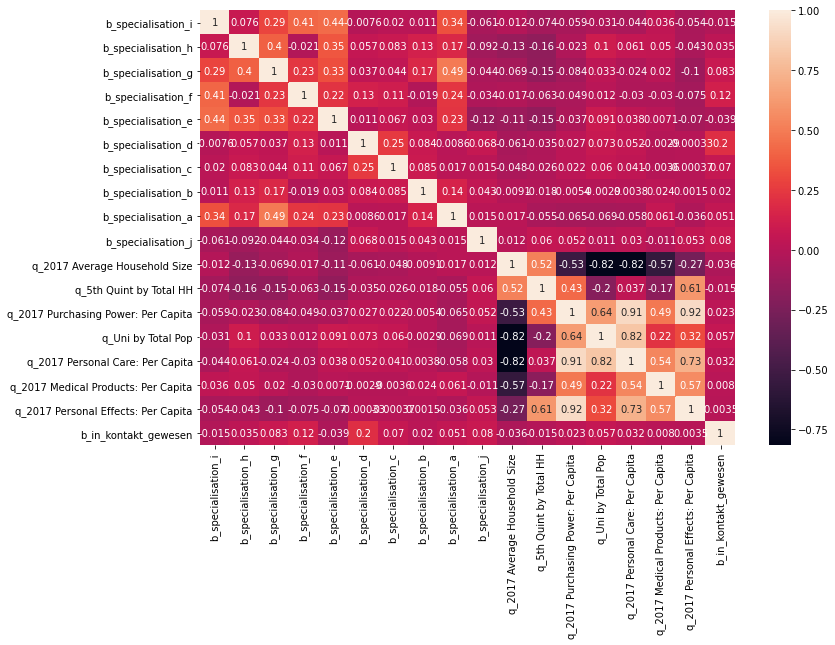

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), 
            xticklabels = X_train.corr().columns.values,
            yticklabels = X_train.corr().columns.values,
            annot = True);

In [38]:
### Dropping highly correlated variables
X_train = X_train.drop(['q_2017 Personal Effects: Per Capita', 'q_2017 Purchasing Power: Per Capita', 'q_Uni by Total Pop'
                       ], axis=1)
X_test = X_test.drop(['q_2017 Personal Effects: Per Capita', 'q_2017 Purchasing Power: Per Capita', 'q_Uni by Total Pop'
                       ], axis=1)

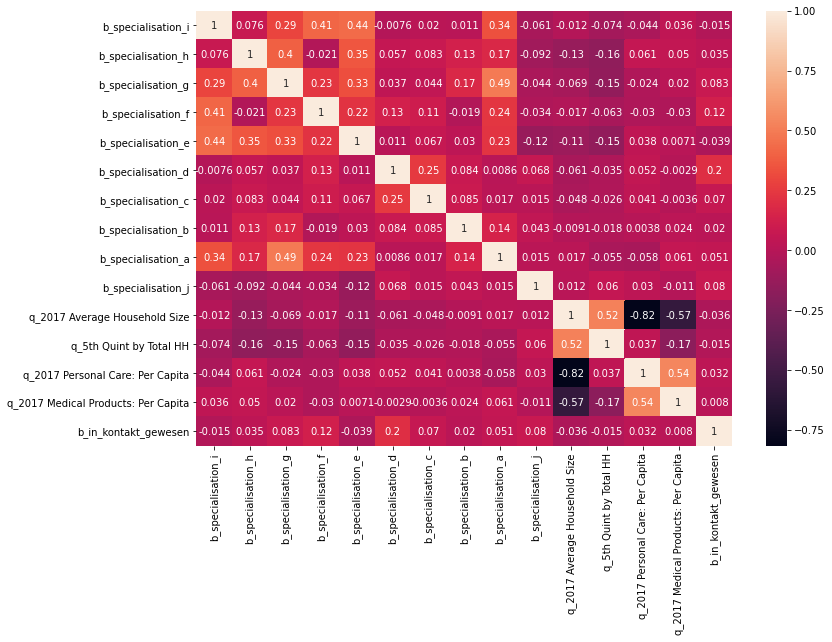

In [39]:
# plotting the heatmap again to identiy the highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), 
            xticklabels = X_train.corr().columns.values,
            yticklabels = X_train.corr().columns.values,
            annot = True);

In [40]:
X_train.columns

Index(['b_specialisation_i', 'b_specialisation_h', 'b_specialisation_g',
       'b_specialisation_f', 'b_specialisation_e', 'b_specialisation_d',
       'b_specialisation_c', 'b_specialisation_b', 'b_specialisation_a',
       'b_specialisation_j', 'q_2017 Average Household Size',
       'q_5th Quint by Total HH', 'q_2017 Personal Care: Per Capita',
       'q_2017 Medical Products: Per Capita', 'b_in_kontakt_gewesen'],
      dtype='object')

In [41]:
# applying the RFE algorithm as Logistic Regression for feature selection
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [42]:
rfe.support_

array([False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True])

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('b_specialisation_i', False, 5),
 ('b_specialisation_h', False, 2),
 ('b_specialisation_g', True, 1),
 ('b_specialisation_f', True, 1),
 ('b_specialisation_e', True, 1),
 ('b_specialisation_d', True, 1),
 ('b_specialisation_c', False, 4),
 ('b_specialisation_b', True, 1),
 ('b_specialisation_a', False, 6),
 ('b_specialisation_j', False, 3),
 ('q_2017 Average Household Size', True, 1),
 ('q_5th Quint by Total HH', True, 1),
 ('q_2017 Personal Care: Per Capita', True, 1),
 ('q_2017 Medical Products: Per Capita', True, 1),
 ('b_in_kontakt_gewesen', True, 1)]

In [44]:
#list of RFE supported columns, i.e, the important features
col = X_train.columns[rfe.support_]
col

Index(['b_specialisation_g', 'b_specialisation_f', 'b_specialisation_e',
       'b_specialisation_d', 'b_specialisation_b',
       'q_2017 Average Household Size', 'q_5th Quint by Total HH',
       'q_2017 Personal Care: Per Capita',
       'q_2017 Medical Products: Per Capita', 'b_in_kontakt_gewesen'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['b_specialisation_i', 'b_specialisation_h', 'b_specialisation_c',
       'b_specialisation_a', 'b_specialisation_j'],
      dtype='object')

In [46]:
# details of the important features
X_train[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017 entries, 3238 to 1544
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   b_specialisation_g                   3017 non-null   int64  
 1   b_specialisation_f                   3017 non-null   int64  
 2   b_specialisation_e                   3017 non-null   int64  
 3   b_specialisation_d                   3017 non-null   int64  
 4   b_specialisation_b                   3017 non-null   int64  
 5   q_2017 Average Household Size        3017 non-null   float64
 6   q_5th Quint by Total HH              3017 non-null   float64
 7   q_2017 Personal Care: Per Capita     3017 non-null   float64
 8   q_2017 Medical Products: Per Capita  3017 non-null   float64
 9   b_in_kontakt_gewesen                 3017 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 259.3 KB


In [47]:
# Building the GLM model on features selected by RFE. 

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       b_gekauft_gesamt   No. Observations:                 3017
Model:                            GLM   Df Residuals:                     3006
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46.792
Date:                Mon, 09 Aug 2021   Deviance:                       93.584
Time:                        02:48:29   Pearson chi2:                     84.7
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -46.7377   3.41e+04     -0.001      0.999   -6.69e+04    6.68e+04
b_specialisation_g                     -0.8069      0.535     -1.509      0.131      -1.855       0.241
b_specialisation_f                      0.0376      0.564      0.067      0.947      -1.069       1.144
b_specialisation_e                     -0.5623      0.677     -0.830      0.406      -1.890       0.765
b_specialisation_d                      1.4730      1.193      1.235      0.217      -0.865       3.811
b_specialisation_b                     21.8191   2.42e+04      0.001      0.999   -4.74e+04    4.75e+04
q_2017 Average Household Size           3.6109      1.565      2.307      0.021       0.543       6.678
q_5th Quint by Total HH                -2.4142      0.957     -2.522      0.012      -4.290      -0.538
q_2017 Personal Care: Per Capita        3.3598      1.323      2.539      0.011       0.766       5.954
q_2017 Medical Products: Per Capita    -0.3105      0.336     -0.923      0.356      -0.970       0.349
b_in_kontakt_gewesen                   47.2614   3.41e+04      0.001      0.999   -6.68e+04    6.69e+04
=======================================================================================================
"""

In [48]:
#col = col.drop(['fakeID','b_specialisation_i','b_specialisation_h'],1)
#col = col.drop(['fakeID','b_specialisation_d','b_specialisation_h', 'b_specialisation_g', 'b_specialisation_f', 'b_specialisation_c', 'b_specialisation_j'],1)
# dropping further features with high p-value as these features are not statistically significant
col = col.drop(['b_specialisation_g', 'b_specialisation_f','b_specialisation_e', 'b_specialisation_d', 'b_specialisation_b',
               'b_in_kontakt_gewesen'],1)

In [49]:
# building the GLM model again after dropping the above features
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       b_gekauft_gesamt   No. Observations:                 3017
Model:                            GLM   Df Residuals:                     3012
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -236.94
Date:                Mon, 09 Aug 2021   Deviance:                       473.87
Time:                        02:51:42   Pearson chi2:                 3.05e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.2758      0.168    -25.449      0.000      -4.605      -3.946
q_2017 Average Household Size           1.3982      0.930      1.503      0.133      -0.425       3.222
q_5th Quint by Total HH                -1.0419      0.548     -1.901      0.057      -2.116       0.032
q_2017 Personal Care: Per Capita        1.6838      0.836      2.013      0.044       0.045       3.323
q_2017 Medical Products: Per Capita    -0.2295      0.201     -1.145      0.252      -0.623       0.164
=======================================================================================================
"""

In [52]:
# dropping the feature with p-value > 0.05
col = col.drop(['q_2017 Average Household Size'],1)

In [53]:
# building the GLM model again after dropping the above features
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       b_gekauft_gesamt   No. Observations:                 3017
Model:                            GLM   Df Residuals:                     3013
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -238.07
Date:                Mon, 09 Aug 2021   Deviance:                       476.14
Time:                        02:59:52   Pearson chi2:                 3.06e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.2415      0.162    -26.227      0.000      -4.558      -3.924
q_5th Quint by Total HH                -0.2684      0.175     -1.536      0.125      -0.611       0.074
q_2017 Personal Care: Per Capita        0.4897      0.202      2.423      0.015       0.094       0.886
q_2017 Medical Products: Per Capita    -0.2337      0.201     -1.162      0.245      -0.628       0.160
=======================================================================================================
"""

In [54]:
# dataframe that contains the names of all the feature variables
# and their respective variance inflation factor (VIFs) to detect multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,q_2017 Medical Products: Per Capita,1.50
1,q_2017 Personal Care: Per Capita,1.46
0,q_5th Quint by Total HH,1.06


#### Evaluation

In [55]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3238    0.009523
2749    0.024624
1483    0.017191
1327    0.003952
177     0.022501
1535    0.011607
260     0.007813
1243    0.005557
1977    0.025147
2279    0.015154
dtype: float64

In [56]:
y_train_pred = y_train_pred.values.reshape(-1)
# plotting the regression score
y_train_pred[:10]

array([0.00952294, 0.02462396, 0.01719052, 0.00395236, 0.02250088,
       0.01160748, 0.00781268, 0.00555653, 0.02514722, 0.01515353])

In [57]:
# creating a data frame with predicted lead probability and the ground label
y_train_pred_final = pd.DataFrame({'Converted_label':y_train.values, 'Predicted_lead_prob':y_train_pred})
y_train_pred_final['custID'] = y_train.index
y_train_pred_final.head()

,Converted_label,Predicted_lead_prob,custID
0,0,0.009523,3238
1,0,0.024624,2749
2,0,0.017191,1483
3,0,0.003952,1327
4,0,0.022501,177


In [58]:
# Considering Predicted_Hot_Lead = 1 if Predicted_lead_prob > 0.5 and 0 if Predicted_lead_prob < 0.5
y_train_pred_final['Predicted_Hot_Lead'] = y_train_pred_final.Predicted_lead_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted_label,Predicted_lead_prob,custID,Predicted_Hot_Lead
0,0,0.009523,3238,0
1,0,0.024624,2749,0
2,0,0.017191,1483,0
3,0,0.003952,1327,0
4,0,0.022501,177,0


In [59]:
# Lead score is the rounded percentage score of the Predicted_lead_prob
y_train_pred_final['Lead_Score'] = round((y_train_pred_final['Predicted_lead_prob'] * 100),0)

y_train_pred_final['Lead_Score'] = y_train_pred_final['Lead_Score'].astype(int)

# Let's see the head
y_train_pred_final.head()

,Converted_label,Predicted_lead_prob,custID,Predicted_Hot_Lead,Lead_Score
0,0,0.009523,3238,0,1
1,0,0.024624,2749,0,2
2,0,0.017191,1483,0,2
3,0,0.003952,1327,0,0
4,0,0.022501,177,0,2


In [73]:
# Let's check the overall training accuracy.
print(round(metrics.accuracy_score(y_train_pred_final.Converted_label, y_train_pred_final.Predicted_Hot_Lead),4))

0.9844


In [61]:
# selecting the test set with the top selected features from the RFE 
X_test = X_test[col]
# lets see the head of test set
X_test.head()

,q_5th Quint by Total HH,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita
3059,-0.435068,0.850925,0.004939
2411,0.355757,0.673988,0.713548
3350,-0.410769,0.860684,0.035630
2300,1.242524,-0.407575,-0.371481
3602,1.400865,-0.411818,1.608110


In [62]:
# shape of the test matrices
X_test.shape

(755, 3)

In [63]:
X_test_sm = sm.add_constant(X_test)

In [64]:
# Getting the test predictions
y_test_pred = res.predict(X_test_sm)

In [65]:
# Test dataframe with prediected lead probability 
y_test_pred_final = pd.DataFrame({'Converted_label':y_test.values, 'Predicted_lead_prob':y_test_pred})
y_test_pred_final['custID'] = y_test.index
y_test_pred_final.head()

,Converted_label,Predicted_lead_prob,custID
3059,0,0.023912,3059
2411,0,0.015163,2411
3350,0,0.023705,3350
2300,0,0.009124,2300
3602,0,0.005515,3602


In [66]:
# Considering Predicted_Hot_Lead = 1 if Predicted_lead_prob > 0.5 and 0 if Predicted_lead_prob < 0.5
y_test_pred_final['Predicted_Hot_Lead'] = y_test_pred_final.Predicted_lead_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted_label,Predicted_lead_prob,custID,Predicted_Hot_Lead
3059,0,0.023912,3059,0
2411,0,0.015163,2411,0
3350,0,0.023705,3350,0
2300,0,0.009124,2300,0
3602,0,0.005515,3602,0


In [67]:
y_test_pred_final['Lead_Score'] = round((y_test_pred_final['Predicted_lead_prob'] * 100),0)

y_test_pred_final['Lead_Score'] = y_test_pred_final['Lead_Score'].astype(int)

# Let's see the head
y_test_pred_final.head()

,Converted_label,Predicted_lead_prob,custID,Predicted_Hot_Lead,Lead_Score
3059,0,0.023912,3059,0,2
2411,0,0.015163,2411,0,2
3350,0,0.023705,3350,0,2
2300,0,0.009124,2300,0,1
3602,0,0.005515,3602,0,1


In [72]:
# Let's check the overall test accuracy.
print(round(metrics.accuracy_score(y_test_pred_final.Converted_label, y_test_pred_final.Predicted_Hot_Lead),4))

0.9868


### Hyperparameter Tuning of Decision Tree Classifier

In [74]:
model_tree_finetuned = DecisionTreeClassifier()

tuned_parameters= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2", None],
                   'min_samples_leaf': range(1,100,1) , 'max_depth': [2, 4, 8, 16, 32, 64, 128, 256, 512, None]
                  }

In [77]:
from sklearn.model_selection import GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_tree_finetuned= GridSearchCV(model_tree_finetuned, tuned_parameters,
                                   cv=cv, scoring='accuracy')

In [84]:
X_test.shape

(755, 3)

In [85]:
# selecting the test set with the top selected features from the RFE 
X_train = X_train[col]

In [88]:
model_tree_finetuned.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, 64, 128, 256, 512,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': range(1, 100)},
             scoring='accuracy')

In [89]:
print(model_tree_finetuned.best_score_)

0.984423885063035


In [90]:
print(model_tree_finetuned.best_estimator_)

DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_leaf=2)


In [91]:
print(model_tree_finetuned.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2}


In [92]:
y_pred_fine_rf = model_tree_finetuned.predict(X_test)

In [94]:
# Let's check the overall test accuracy for fine tuned decision tree
print(round(metrics.accuracy_score(y_test, y_pred_fine_rf),4))

0.9868


We observed that after hyperparameter tuning using GridSearch, the DecisionTree classifier does not overfit like before.